# Integrantes del grupo

Grupo del Laboratorio: 10
Grupo de estudios: 12 - Fundae
Listado de integrantes:
- Beatriz Garcia Collado
- Manuel Naranjo Martínez
- Óscar Martínez Olmos
- Pablo David Lombardo Papi

# Asistencia a las reuniones

Relizadas los días:
- Laboratorio: 18/12/2020
- Reunión 1: 22/12/2020
- Reunión 2: 28/12/2020

| Nombre | Asistencias |
| -- | -- |
| Beatriz Garcia Collado | 3 |
|  Manuel Naranjo Martínez | 3 |
|  Óscar Martínez Olmos | 3 |
|  Pablo David Lombardo Papi | 3 |

# Descripción del problema

El artefacto elegido para la práctica tiene el nombre de **Rolling shutter lightning artifacts** y necesita un elemento externo poco predecible como es un rayo. El artefacto se produce sobre la escena durante la toma de la fotografía, no siendo generado por un mal funcionamiento de la lente, el sensor o el procesamiento. Al capturar los píxeles en el sensor de izquierda a derecha (si aparece un rayo en el cielo) este provoca que se ilumine una zona concreta de la escena durante cierto período. 

![Florida-Rolling-Shutter-Explained-Metabunk](./imagenes/Florida-Rolling-Shutter-Explained-Metabunk.gif)


## Características del artefacto

El artefacto tendría las características de una *anomalía colectiva*, son una serie de datos que durante un período concreto sufren una sobreexposición que solo se puede detectar como sobreexposición en ese contexto, ya que en otras partes de la imagen puede haber píxeles con mayor valor.

### Dirección vertical

Siempre y cuando la captura de píxeles en el sensor se lleve a cabo de izquierda a derecha, el artefacto aparecerá como franja vertical. Si los tomase de arriba a abajo, el artefacto sería horizontal. 

Como el artefacto está relacionado con la captura que se produce en el sensor, con los píxeles ordenados en columnas perfectamente verticales, no se verá afectado si la camara tiene algún tipo de inclinación respecto al horizonte en la escena que está capturando. La imagen de salida siempre será una franja completamente vertical que no tendrá ninguna inclinación con una precisón al píxel.

###  Zona sobreexpuesta

Los rayos siempre van a sobreexponer la imagen porque van a añadir luz a la escena. 

Existe la posibilidad de que el fenómeno, en este caso un rayo, no ilumine de forma constante toda la franja. Sin embargo, en ningún caso, eso podriá producir que la franja sea más oscura de lo esperado. Los parámetros de la cámara con los que se está tomando la captura no se modifican, por ese motivo, el rayo que es un fenómeno que causa un aumento de luz, solo puede crear una escena más iluminada. 

Es bastante probable que fenómenos como un rayo con una gran diferencia lumínica causen que la franja aparezca como una zona quemada de la imagen. Si esto ocurre, se perderá información de esa zona en concreto, y ni una corrección en su intensidad podría recuperar correctamente la imagen.


### Grosor constante en la banda

Grosor constante en la imagen, otras imágenes tendrán otros grosores dependientes de la duración del fenómeno o de la velocidad de captura de la cámara. Por ejemplo, si un rayo es de mayor potencia, se mantiene más tiempo en el cielo o la velocidad del sensor en ir recogiendo los valores de cada pixel sea mayor o menor. Todo esto influirá en el grosor total de la banda.

### No afecta a toda la banda de forma constante en horizontal

Pese a ser un incremento rápido de la exposición de luz, se produce un *efecto de barril* que indica que tanto al inicio como al final del rayo, la exposición no es la misma que en su apogeo. Por tanto, se produce un efecto barril en la franja, con los bordes más oscurecidos en comparación con el resto del artefacto. Además, dado que el cielo en estos casos suele estar nublado, tienen características irregulares según la nubosidadd de esa zona y donde se haya producido el rayo. Esto provoca que cada zona sufra un efecto de sobreexposición diferente según el relieve de las nubes o la localización del foco del rayo.


### No afecta a toda la banda de forma constante en vertical

Al ser un fenómeno como un rayo, las características de las escenas pueden ser muy variadas. Por lo general, hemos visto que el efecto se produce principalmente en la parte de cielo de la imagen. En cambio, las partes inferiores de la imagen correspondientes a un primer plano no se suelen verse afectadas por este fenómeno. Aparecen brillos en superficies reflectantes pero por lo general, iluminan a los sujetos desde atrás, por lo que no se ven afectados en la imagen.

### No es solo aumento en exposición, sino también cambio en temperatura de la luz

Dado que la temperatura de la luz que emite un rayo es de un tipo y la que ilumina la escena en ese momento del día (generalmente es de otro), se producen diferencias en la coloración de la franja que no corresponden solamente a las de un aumento de exposición, sino a las de un cambio en la temperatura de la luz que las ilumina.



# Imagenes a corregir

* **Imagen número 1**: Pirámide
* **Imagen número 2**: Iglesia

<img align="left" src="imagenes/piramide.png" alt="Pirámide" style="width: 300px;"/>
<img align="center" src="imagenes/iglesia.png" alt="Iglesia" style="width: 300px;"/>



# Solución propuesta

La solución propuesta se basa en acotar el artefacto y aplicarle una compensación de exposición dadas las características propias definidas en el apartado anterior. 

Se ha seguido una aproximación de tipo espacial, se trata de delimitar correctamente los píxeles donde se produce el artefacto para que la corrección no afecta a otras zonas de la imagen.

## Acotación de la franja

La zona del rayo sobreexpuesta (que denominaremos *franja*) es siempre vertical y tiene una columna de inicio y otra de final. Para ello, en un primer momento, se intentó delimitar las columnas utilizando un sumatorio de todos los **máximos** que aparecen en la fotografía y aplicando una detección de máximos (picos) similar al ejemplo mostrado en las lecciones magistrales de la asignatura. Para algunos casos particulares esta solución funcionaba correctamente pero en imágenes donde aparecian otros máximos de luz o en los cuales el artefacto no tenia tanto brillo no servían. 

La solución adoptada es similar, pero nos basamos en detectar los **gradientes de exposición** que ocurren en la imagen. Además, para eliminar posibles **falsos gradientes** que no corresponden al artefacto, y aprovechando que la franja es vertical, aplicamos a cada línea de la imagen el cálculo de sus gradientes y realizando un sumatorio de todas las líneas para calcular cuales son las columnas que poseen un mayor número en el gradiente. Para una gran cantidad de casos, este método delimita correctamente las columnas de píxeles entre las que se produce la franja del artefacto.

Por otro lado, también se debe de acotar la franja de manera vertical, ya que el artefacto suele ocurrir en la parte del cielo (superior de la franja), y no en el primer plano de la imagen (inferior de la franja). Se ha vuelto a utilizar el método anterior para calcular el cambio mayor de gradiente, pero en este caso, se ha realizado según sus columnas. Se ha calculado el gradiente por cada columna, y se ha realizado un sumatorio de todas ellas para ver dónde se produce el gradiente acumulado mayor. Este será establecido como el final del artefacto.

## Disminución de la exposición

En un primer momento se intento aplicar una corrección constante a toda la franja para disminuir la exposición a la luz producida. En cambio, tal y como hemos definido en las características del artefacto, este no es constante ni de manera horizontal ni de manera vertical.

Se ha aplicado una metodología para realizar una corrección que suavice el efecto del cambio que se produce en la vertical de la franja. Para ello, por cada fila de píxeles que hay en la franja, se calcula su media, y se corrigen en grupo con la diferencia de la media del mismo número de píxeles que el ancho de la franja tomados a un lado de la misma. 

Se elige el lado **izquierdo o derecho** de la franja para calcular la média de valores de intensidad de un número de píxeles igual a la anchura de la franja, en base a la diferencia de su media con la media de los píxeles de la franja, y tomando aquellos que tienen una diferencia menor. Con esta elección se intenta evitar algunas zonas que son cercanas a la franja pero que no corresponden a una parte de cielo similar a donde se produce el evento, por ejemplo, alteradas por un árbol alto o una farola. Además, para mejorar el cálculo de la media y la corrección, se eliminarán outliers que puedan ocurrir en esa franja. Para la eliminación de los outliers, se ha cogido el vector correspondiente de la franja de cada fila, y se han buscado valores que se desvíen en dos desviaciones típicas de la media.

La corrección de la exposición se aplican por cada canal de color por separado. Esto produce además que haya una corrección de lo que sería las diferentes posibles cambios en la temperatura de la luz iluminando el cielo.




# Ejecución comentada del algoritmo

## Librerías necesarias

Cargamos todas las librerías que necesitaremos para resolver la actividad.

* numpy: Trabajo con arrays
* matplotlib: Representación de funciones e imágenes
* opencv: Carga de imágenes y obtención de propiedades y canales de la misma
* scipy: Librería para operaciones matemáticas
* operator: Librería para trabajar con sus operadores

In [1]:
# Importamos librerias necesarias 
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.signal import argrelextrema
import operator

## Definición de funciones

Definición de funciones necesarias para realizar las diferentes acciones de resolución.

In [30]:
def imshow(img, title=None):
    """
    Función para representar una imagen
    
    Args:
        img (Numpy Array): Imagen en formato numpy array
        title (String): Texto del título del plot
    """
    fig , ax = plt.subplots(figsize = (7,7))
    ax.imshow(img, cmap=plt.cm.gray)
    ax.set_xticks([])
    ax.set_yticks([])
    if (title is not None):
        plt.title(title)
    plt.show()
    
    
def maxOfRow(row):
    """
    Función para devolver los máximos de un vector de valores
    
    Args:
        row (Numpy Array): Vector de valores sobre el que calcular
                           el máximo.
        
    Return: Numpy array con los valores máximos
    """
    m = max(row)
    return np.array([i for i, j in enumerate(row) if j == m])


def fixImage(img, _from, _to, band):
    """
    Función para corregir la franja en la que se produce el artefacto en una imagen
    
    Args:
        img (Numpy Array): Imagen sobre la que corregir artefacto
        _from (Int): Valor del píxel de origen de la franja
        _to (Int): Valor del píxel de finalización de la franja
        band (Int): Banda sobre la que se realiza la corrección
        
    Return: Tupla (Numpy Array con la imagen modificada y corregida,
                   gradientes de la banda)
    """
    ###editar la franja
    modifiedImg = np.array(img)
    
    gradients = np.zeros(len(img[:,0]))

    for j in range(_from, _to):
        gradients = [x + y for x, y in zip(gradients, np.gradient(img[:,j]))]           
    
    rowLimit = min(gradients)
    rowLimit = [i for i, j in enumerate(gradients) if j == rowLimit][0]
    for i in range(rowLimit):
        row = img[i,:]
        newRow = fixRow(row, _from, _to)
        modifiedImg[i, _from:_to] = newRow
    
    return modifiedImg, gradients


def fixRow(row, _from, _to):
    """
    Función para corregir los valores de una fila de la imagen
    
    Args:
        row (Numpy Array): Vector con los valores de la fila de la
                           imagen a corregir
        _from (Int): Posición del píxel de inicio desde el que corregir
        _to (Int): Posición del píxel de final hasta el que corregir 
    
    Return: Numpy Array de valores modificados con la fila cambiada
    """
    # Elegimos el lado que sirve de base para hacer la correccion
    # Eliminan outliers para sacar la media de cada tramo
    rangeLen = _to - _from
    
    leftSliceCorrect = row[_from-rangeLen:_to-rangeLen]
    leftSliceCorrectValue = np.mean(deleteOutlier(leftSliceCorrect))
    rightSliceCorrect = row[_from+rangeLen:_to+rangeLen]
    rightSliceCorrectValue = np.mean(deleteOutlier(rightSliceCorrect))

    artefactSlice = row[_from:_to]
    artefactSliceValue =np.mean(deleteOutlier(artefactSlice))
    
    dLeft = abs(leftSliceCorrectValue - artefactSliceValue)
    dRight = abs(rightSliceCorrectValue - artefactSliceValue)
    
    if (dRight<dLeft):
        #lado = "derecho"
        valueSlideCorrection = rightSliceCorrectValue
    else:
        #lado = "izquierdo"
        valueSlideCorrection = leftSliceCorrectValue
            
    diff = artefactSliceValue - valueSlideCorrection

    #print ("Diferencia:", diff,
    #       "lado: ", lado,
    #       "izq: ", leftSliceCorrectValue,
    #       "mid: ", artefactSliceValue,
    #       "der: ", rightSliceCorrectValue,
    #       "Diferencia: ", diff)
    
    newRow = row[_from:_to] - diff
    
    #Correccion de maximos minimos en la imagen
    newRow[newRow < 0] = 0
    newRow[newRow > 255] = 255  
    
    return newRow
    
    
def deleteOutlier(an_array):
    """
    Función para eliminar los posibles outliers de nuestro vector de valores
    
    Args:
        an_array (Numpy Array): Valores sobre los que corregir los outliers
        
    Return: Numpy Array Vector sin los outliers
    """
    mean = np.mean(an_array)
    standard_deviation = np.std(an_array)
    distance_from_mean = abs(an_array - mean)
    max_deviations = 2
    not_outlier = distance_from_mean < max_deviations * standard_deviation
    no_outliers = an_array[not_outlier]
    return no_outliers 


def detectBand(gradients):
    """
    Función para detectar la franja de valores atípicos
    
    Args:
        gradients (List): Listado de valores gradientes
        
    Return: Tuple con los valores máximo y mínimo de gradiente
    """
    #detecta la franja en una línea dado un máximo
    
    max_g = max(gradients)
    maximum_gradient = [i for i, j in enumerate(gradients) if j == max_g][0]
    min_g = min(gradients)
    minimum_gradiente = [i for i, j in enumerate(gradients) if j == min_g][0]
    return maximum_gradient, minimum_gradiente


def getGrandientSumBands(img):
    """
    Función para detectar las bandas mediante suma de gradientes????
    
    Args:
        img (Numpy Array): Imagen sobre la que detectar las franjas
        
    Return: Tupla (maximum_gradient, minimum_gradiente, gradients)
    """
    nRows = img.shape[0]
    gradients = np.zeros(len(img[0,:,0]))
    
    for i in range(3):  
        for j in range(nRows):
            gradients = [x + y for x, y in zip(gradients, np.gradient(img[j,:,i]))]            

    return detectBand(np.array(gradients)), gradients

## Código de ejecución

Código en el que se ejecutan las funciones sobre las imágenes con el artefacto para detectar y corregir el mismo.

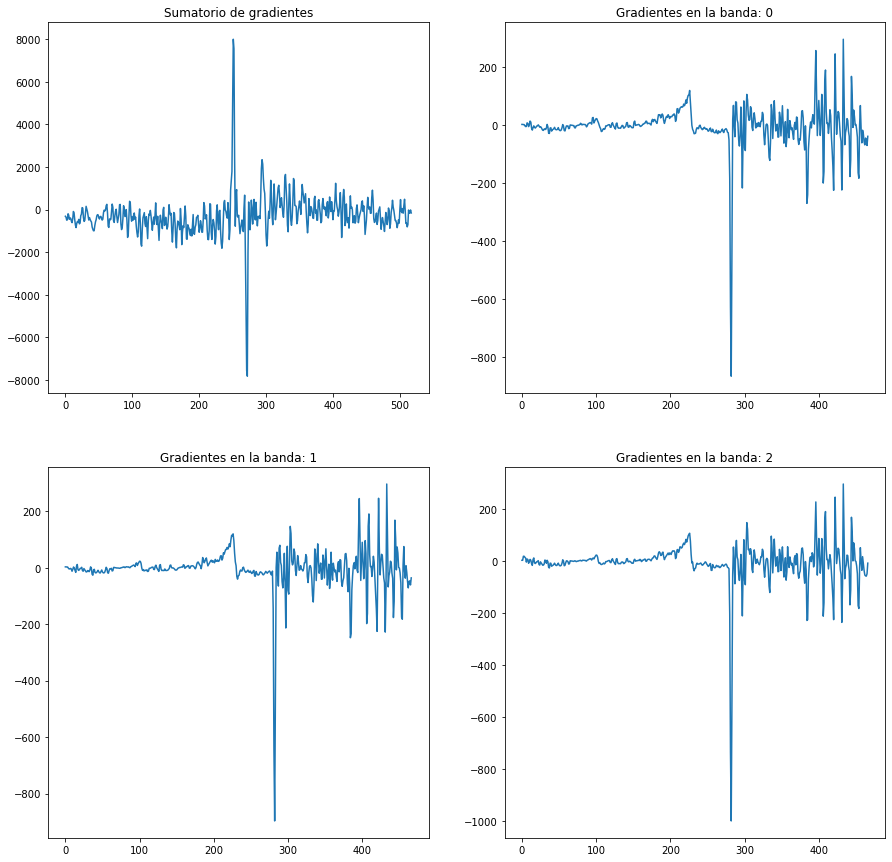

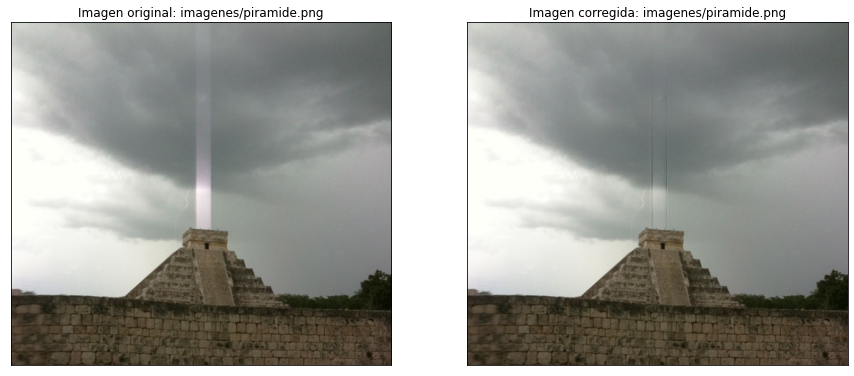

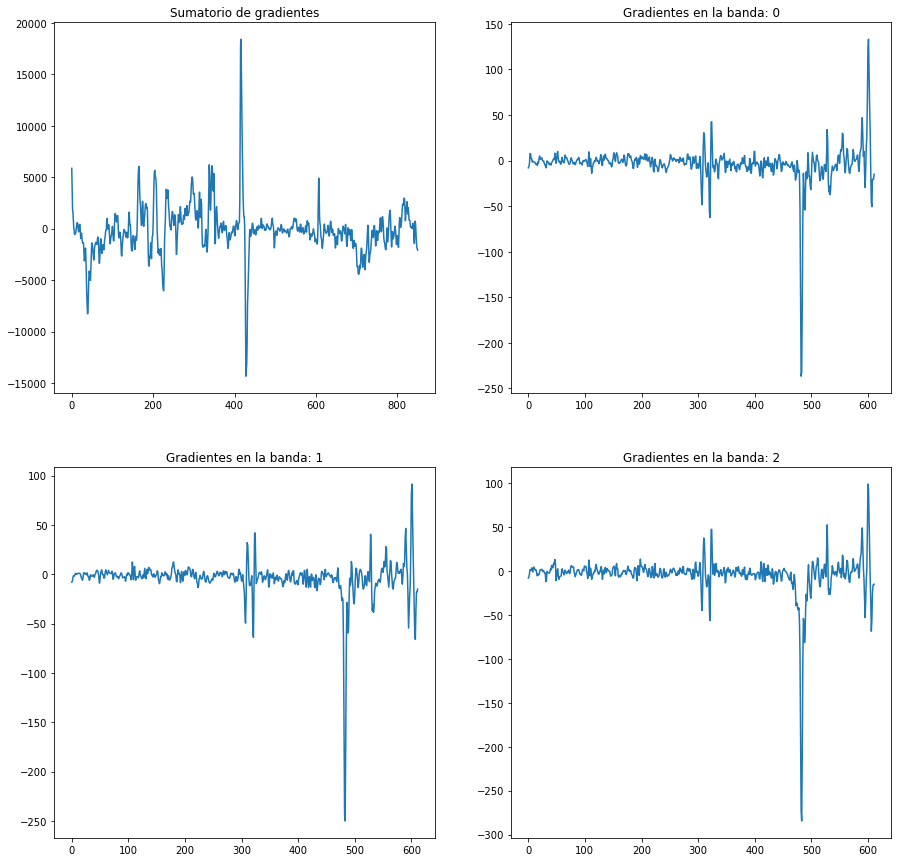

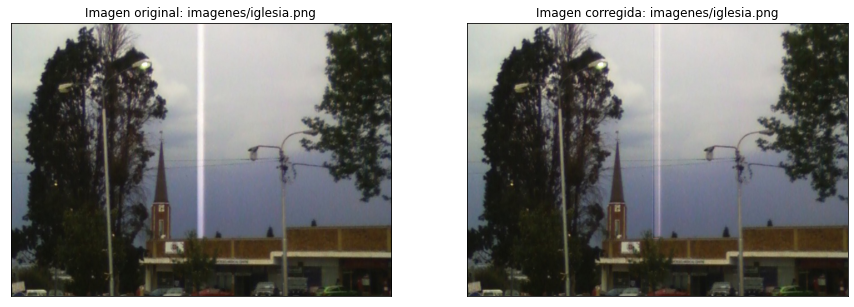

In [31]:
from IPython.core.display import display, HTML

# Cargamos los paths de las imgs
imgs_path = ['imagenes/piramide.png', 
             'imagenes/iglesia.png']
display(HTML('<h1>Corrección de imagenes</h1>'))
# Recorremos las imgs para realizar la deteccion y correccion a cada una
for img_path in imgs_path:
    display(HTML('<h2>Imagen: '+ img_path + '</h2>'))
    # cargamos la img
    originalImg = cv2.imread(img_path)

    # obtenemos las dimensiones de la img
    h, w, b = originalImg.shape
    
    # Cambiamos de BGR a RGB
    originalImg = cv2.cvtColor(originalImg, cv2.COLOR_BGR2RGB)
    # Creamos una copia de la imagen para modificar sobre ella el artefacto
    fixedImg = np.array(originalImg)
    
    f, plots = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
    
    # Obtenemos el origen y final del artefacto
    f_t, gradient = getGrandientSumBands(originalImg)
    _from = f_t[0]
    _to = f_t[1]
    
    plots[0][0].plot(gradient)
    plots[0][0].title.set_text('Sumatorio de gradientes')
    
    # Recorremos las bandas para corregir en cada una de ellas el artefacto
    for i in range(b):    
        fixedImg[:,:,i], gradient = fixImage(originalImg[:,:,i], _from, _to, i)
        if i == 0:
            plots[0][1].plot(gradient)
            plots[0][1].title.set_text("Gradientes en la banda: "+ str(i))
        elif i==1:
            plots[1][0].plot(gradient)
            plots[1][0].title.set_text("Gradientes en la banda: "+ str(i))
        elif i==2:
            plots[1][1].plot(gradient)
            plots[1][1].title.set_text("Gradientes en la banda: "+ str(i))
        
    plt.show()
    
    # Mostramos la imagen original y la arreglada
    f, plots = plt.subplots(ncols=2, figsize=(15,15))
    
    plots[0].imshow(originalImg)
    plots[0].set_xticks([]), plots[0].set_yticks([])
    plots[0].title.set_text('Imagen original: '+ img_path)
    plots[1].imshow(fixedImg)
    plots[1].set_xticks([]), plots[1].set_yticks([])
    plots[1].title.set_text('Imagen corregida: '+ img_path)
    plt.show()


# Análisis de resultados

Los resultados en la imagen de la **pirámide** son muy satisfactorios. Se puede comprobar que la corrección por filas produce un buen resultado ya que las correcciones en la parte superior son menores en tamaño que las de la parte inferior. La acotación de la franja es correcta con la única excepción de las lineas en el borde de las franja que tendrían que tratarse de forma independiente ya que se comportan diferentes a las del centro de ella, de ahí que la corrección produzca un efecto de oscurecimiento.

![Análisis piramide](imagenes/analisis_piramide1.png)

En la imagen de la **iglesia** los resultados son similares, con la diferencia de que al ser la franja más pequeña, esos píxeles en sus bordes cobran mayor importancia y producen que la corrección no sea del todo acertada.


# Conclusiones

Este artefacto es un artefacto muy cambiante ya que no es constante ni su forma, ni su localización, ni su corrección. Incluso dentro del propio artefacto se producen valores cambiantes que requieren de implementar otras soluciones distintas para su corrección. 

En esta implementación, se quedan fuera de la corrección algunas características como reflejos producidos por la iluminación extra, que estén en una zona que no es principalmente el cielo. En algunos casos hay elementos como otras nubes que tapan parcialmente la franja de luz, por lo que hace que haya artefactos que tienen una forma discontinua y esto produce que la corrección del artefacto se corte antes de lo previsto.

Además ocurren otros problemas en la localización de la franja, el cambio de gradientes se puede producir en otros casos como son farolas o postes de cemento, que al ser también verticales confunden al algoritmo porque se comportan de forma similar al artefacto: franjas verticales con una exposición mayor comparada con el cielo. En fotos nocturas con gran cantidad de luces, también se puede producen cambios fuertes de gradiente que dificultan la tarea.

Parece ser que para tener un algoritmo que cumpla correctamente para corregir este artefacto y se cumpla bajo todas las condiciones posibles, se deberían de juntar diferentes métodos para la detección de franjas sobreexpuestas y correcciones no uniformes sobre ellas, tanto en vertical como en horizontal, teniendo que tratar los píxeles de las lines dentro de la franja como independientes. También mejorar el cálculo del valor base para ajustar la exposición de la franja con la del resto de la imagen para que siga manteniendo la forma.

# Referencias 

https://www.metabunk.org/threads/why-people-are-suddenly-seeing-strange-beams-of-light-around-the-world-the-reddit-effect.6722/

https://en.wikipedia.org/wiki/Charge-coupled_device

https://photo.stackexchange.com/questions/52969/why-is-there-a-vertical-bar-of-brighter-exposure-when-photographing-lightning

https://www.kite.com/python/answers/how-to-remove-outliers-from-a-numpy-array-in-python